Conner Delvaux 11/22/2024
Analysis Report

I chose Man on the Moon by Kid Cudi and The Melodic Blue by Baby Keem because both albums hold personal significance. Not only do I genuinely enjoy the music from these albums, but they also represent a special chapter in my life as they were the first two concerts I attended.

In [43]:
import pandas as pd
import json
import requests
import base64
import matplotlib.pyplot as plt
import six
import statsmodels.formula.api as smf
import numpy as np




In [44]:
tokens = pd.read_csv(r"C:\Users\conne\Downloads\Spotify-keys.txt", sep = ',', header = None)
tokens.columns = tokens.iloc[0]
tokens = tokens[1:]
# tokens.Client_Secret[1]

In [45]:
def start_session_headers(client_id, client_secret):
    client_cred = base64.b64encode(six.text_type(client_id + ":" + client_secret).encode("ascii"))
    headers = {"Authorization": "Basic %s" % client_cred.decode("ascii")}
    return headers

# print(start_session_headers(tokens.Client_ID[1], tokens.Client_Secret[1]))

In [46]:
def connect_to_client_cred(url, headers):
    payload = {'grant_type' : 'client_credentials'}
    response = requests.request("POST", url, headers = headers, data = payload)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [47]:
def get_access_token():
    #Uses the Client Credentials flow, no access to endpoints with user data
    url = "https://accounts.spotify.com/api/token"
    header = start_session_headers(tokens.Client_ID[1], tokens.Client_secret[1])
    json_response = connect_to_client_cred(url, header)
    return json_response

In [48]:
session_token = get_access_token()

200


In [49]:
session_token

{'access_token': 'BQBf9GBO6XsyVSWxtRkOOL1fSF6jMNLJ23fdv76OvP968f1dsk1S7kShgM21os5-7_WKLJ6R4GbIa6LXKro_1Rsvb3UJa0YFNpoqYTQ5xWqwHgPJQ_0',
 'token_type': 'Bearer',
 'expires_in': 3600}

In [50]:
def create_header(session_token):
    headers = {"Authorization": "Bearer {}".format(session_token)}
    return headers

#create_header(session_token['access_token'])

In [51]:
def connect_to_endpoint(url, headers):
    response =requests.request("GET", url, headers = headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [52]:
def track_audio_features(id):
    url = 'https://api.spotify.com/v1/audio-features/{}'.format(id)
    header = create_header(session_token['access_token'])
    json_response = connect_to_endpoint(url, header)
    return json_response


In [53]:
def get_an_album(id):
    url = 'https://api.spotify.com/v1/albums/{}'.format(id)
    header = create_header(session_token['access_token'])
    json_response = connect_to_endpoint(url, header)
    return json_response

In [54]:
motm = get_an_album('2S8AWAM0nxyFy66YnUfIs3')
tmb = get_an_album('3r46DPIQeBQbjvjjV5mXGg')

200
200



I chose danceability and liveness because both albums, Man on the Moon by Kid Cudi and The Melodic Blue by Baby Keem, are significant to me as they represent my first two concerts, where I heard many of the songs live. Liveness reflects the energy and authenticity of those live performances, while danceability captures the rhythmic quality of the songs, which were fun and engaging to move to during the concerts. These features help represent the connection I feel to the albums both in terms of their live performances and their danceable energy.

In [55]:
motm.keys()


dict_keys(['album_type', 'total_tracks', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'type', 'uri', 'artists', 'tracks', 'copyrights', 'external_ids', 'genres', 'label', 'popularity'])

In [56]:
tmb.keys()

dict_keys(['album_type', 'total_tracks', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'type', 'uri', 'artists', 'tracks', 'copyrights', 'external_ids', 'genres', 'label', 'popularity'])

In [57]:
motm['tracks']['items'][0]['id']


'3AekRdo1dDMfszL3jAoViv'

In [58]:
tmb['tracks']['items'][0]['id']

'15hJmqqEtASVXl6sM7i4UF'

In [59]:
motm_audio_features = [track_audio_features(x['id']) for x in motm['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [60]:
tmb_audio_features = [track_audio_features(x['id']) for x in tmb['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [61]:
#motm_audio_features


In [62]:
motm_audio_features_df = pd.DataFrame(motm_audio_features)
motm_audio_features_df['Album'] = 'Man On The Moon'
#motm_audio_features_df.head()

In [63]:
tmb_audio_features_df = pd.DataFrame(tmb_audio_features)
tmb_audio_features_df['Album'] = 'The Melodic Blue'
tmb_audio_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Album
0,0.615,0.600,10,-5.620,1,0.2700,0.10700,0.000002,0.283,0.0661,130.027,audio_features,15hJmqqEtASVXl6sM7i4UF,spotify:track:15hJmqqEtASVXl6sM7i4UF,https://api.spotify.com/v1/tracks/15hJmqqEtASV...,https://api.spotify.com/v1/audio-analysis/15hJ...,270671,4,The Melodic Blue
1,0.918,0.529,8,-6.325,1,0.0847,0.00839,0.000000,0.115,0.2620,94.976,audio_features,4Af4H9x1RwADB9XizalvUM,spotify:track:4Af4H9x1RwADB9XizalvUM,https://api.spotify.com/v1/tracks/4Af4H9x1RwAD...,https://api.spotify.com/v1/audio-analysis/4Af4...,163509,4,The Melodic Blue
2,0.628,0.437,4,-7.143,0,0.1710,0.92200,0.000000,0.154,0.5860,87.864,audio_features,74bdnHhtEzkM49KQJh4hK8,spotify:track:74bdnHhtEzkM49KQJh4hK8,https://api.spotify.com/v1/tracks/74bdnHhtEzkM...,https://api.spotify.com/v1/audio-analysis/74bd...,76832,4,The Melodic Blue
3,0.667,0.582,11,-5.791,0,0.2670,0.00466,0.000000,0.124,0.1410,121.972,audio_features,0UTyLmkQgPOEIz95OVAJTR,spotify:track:0UTyLmkQgPOEIz95OVAJTR,https://api.spotify.com/v1/tracks/0UTyLmkQgPOE...,https://api.spotify.com/v1/audio-analysis/0UTy...,316733,4,The Melodic Blue
4,0.833,0.542,3,-8.320,0,0.0679,0.57100,0.001120,0.111,0.2370,132.001,audio_features,7MmBhKBQnaa0I8TaDJs9ia,spotify:track:7MmBhKBQnaa0I8TaDJs9ia,https://api.spotify.com/v1/tracks/7MmBhKBQnaa0...,https://api.spotify.com/v1/audio-analysis/7MmB...,219813,4,The Melodic Blue


In [64]:
albums_compare = pd.concat([motm_audio_features_df, tmb_audio_features_df], axis = 0)
albums_compare

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Album
0,0.675,0.418,2,-12.413,0,0.0548,0.28300,0.000032,0.1040,0.4670,98.462,audio_features,3AekRdo1dDMfszL3jAoViv,spotify:track:3AekRdo1dDMfszL3jAoViv,https://api.spotify.com/v1/tracks/3AekRdo1dDMf...,https://api.spotify.com/v1/audio-analysis/3Aek...,199000,4,Man On The Moon
1,0.484,0.755,9,-6.653,0,0.1360,0.46500,0.000016,0.3750,0.4410,86.496,audio_features,0rFpcfF0YfvFUYsl99Bw9d,spotify:track:0rFpcfF0YfvFUYsl99Bw9d,https://api.spotify.com/v1/tracks/0rFpcfF0YfvF...,https://api.spotify.com/v1/audio-analysis/0rFp...,235627,4,Man On The Moon
2,0.802,0.742,1,-4.607,1,0.1110,0.26500,0.000281,0.6300,0.5120,95.000,audio_features,0RXspLL7GwiGm9KIDdT0ma,spotify:track:0RXspLL7GwiGm9KIDdT0ma,https://api.spotify.com/v1/tracks/0RXspLL7GwiG...,https://api.spotify.com/v1/audio-analysis/0RXs...,151333,4,Man On The Moon
3,0.767,0.448,7,-7.569,0,0.0290,0.51800,0.000479,0.1360,0.6040,79.124,audio_features,6xeTNdPnP5imNgDzFMfVfD,spotify:track:6xeTNdPnP5imNgDzFMfVfD,https://api.spotify.com/v1/tracks/6xeTNdPnP5im...,https://api.spotify.com/v1/audio-analysis/6xeT...,266307,4,Man On The Moon
4,0.723,0.452,11,-9.421,0,0.0329,0.30700,0.006400,0.0923,0.3750,125.015,audio_features,4FgcgJpZaKJRog2EISGWjN,spotify:track:4FgcgJpZaKJRog2EISGWjN,https://api.spotify.com/v1/tracks/4FgcgJpZaKJR...,https://api.spotify.com/v1/audio-analysis/4Fgc...,261360,4,Man On The Moon
5,0.665,0.412,6,-10.186,0,0.0318,0.71700,0.000990,0.1160,0.4970,147.917,audio_features,38RSpldD3Vlc7Uud9gAxFG,spotify:track:38RSpldD3Vlc7Uud9gAxFG,https://api.spotify.com/v1/tracks/38RSpldD3Vlc...,https://api.spotify.com/v1/audio-analysis/38RS...,243027,4,Man On The Moon
6,0.881,0.442,11,-6.278,0,0.0651,0.48000,0.000009,0.1200,0.8030,138.014,audio_features,5wfllwdjglyQislkskYLBv,spotify:track:5wfllwdjglyQislkskYLBv,https://api.spotify.com/v1/tracks/5wfllwdjglyQ...,https://api.spotify.com/v1/audio-analysis/5wfl...,221240,4,Man On The Moon
7,0.564,0.722,10,-7.565,0,0.1410,0.25200,0.107000,0.2450,0.3470,194.275,audio_features,3Ygy1L8ABabUA7MwoOLiPM,spotify:track:3Ygy1L8ABabUA7MwoOLiPM,https://api.spotify.com/v1/tracks/3Ygy1L8ABabU...,https://api.spotify.com/v1/audio-analysis/3Ygy...,220907,4,Man On The Moon
8,0.750,0.707,10,-7.936,0,0.0393,0.10600,0.001020,0.4490,0.7940,120.004,audio_features,0ujsBQIHVikzdQOekiu5gS,spotify:track:0ujsBQIHVikzdQOekiu5gS,https://api.spotify.com/v1/tracks/0ujsBQIHVikz...,https://api.spotify.com/v1/audio-analysis/0ujs...,260200,4,Man On The Moon
9,0.710,0.815,6,-4.869,0,0.0419,0.26200,0.000000,0.2080,0.7030,101.782,audio_features,3HG3QFERdP3Q1b6VGahwWs,spotify:track:3HG3QFERdP3Q1b6VGahwWs,https://api.spotify.com/v1/tracks/3HG3QFERdP3Q...,https://api.spotify.com/v1/audio-analysis/3HG3...,246760,4,Man On The Moon


In [ ]:
Here I am combining the dataframes to make the rest of the analysis easier.

In [65]:
albums_compare.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'Album'],
      dtype='object')

In [66]:
moon = albums_compare[albums_compare['Album'] == 'Man On The Moon']
blue = albums_compare[albums_compare['Album'] == 'The Melodic Blue']

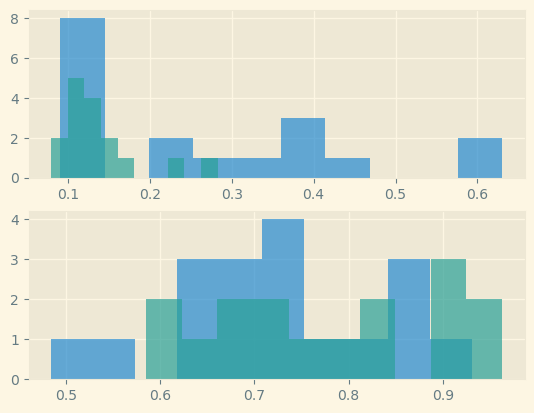

In [67]:
fig1, ax1 = plt.subplots(2)
ax1[0].hist(moon['liveness'], alpha=0.7)
ax1[0].hist(blue['liveness'], alpha=0.7)


ax1[1].hist(moon['danceability'], alpha=0.7)
ax1[1].hist(blue['danceability'], alpha=0.7)
plt.show()



I can conclude that Man on the Moon has more liveness than The Melodic Blue. The same goes for danceability. Man On The Moon songs usually have a better dance ability score.

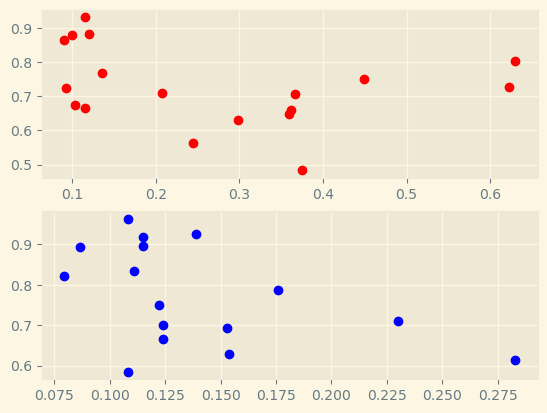

In [68]:
fig2, ax2 = plt.subplots(2)
ax2[0].scatter(moon['liveness'], moon['danceability'], color = 'red')
ax2[1].scatter(blue['liveness'], blue['danceability'], color = 'blue')

plt.show()

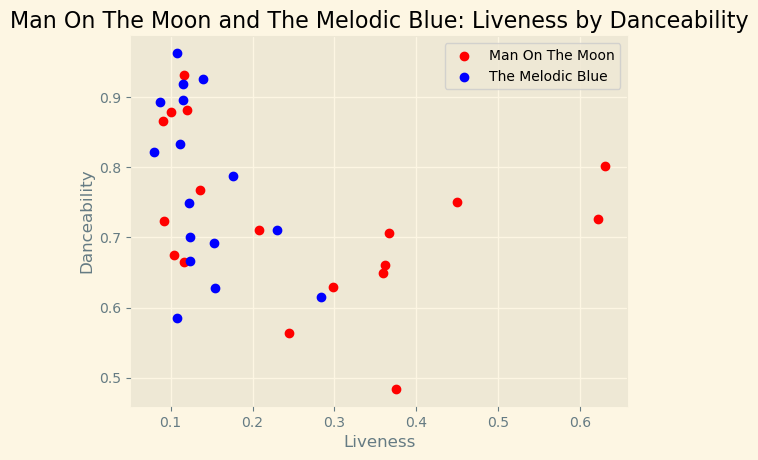

In [69]:
Fig3, ax3 = plt.subplots()
ax3.scatter(moon['liveness'], moon['danceability'], color = 'red', label = 'Man On The Moon')
ax3.scatter(blue['liveness'], blue['danceability'], color = 'blue', label = 'The Melodic Blue')
ax3.set_xlabel('Liveness')
ax3.set_ylabel('Danceability')
ax3.legend(['Man On The Moon', 'The Melodic Blue'])
ax3.set_title('Man On The Moon and The Melodic Blue: Liveness by Danceability')
plt.style.use("Solarize_Light2")

plt.show()

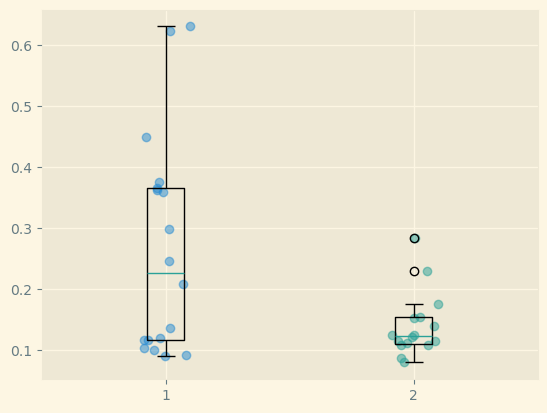

In [75]:
motm_live = albums_compare[albums_compare['Album'] == 'Man On The Moon']['liveness']
tmb_live = albums_compare[albums_compare['Album'] == 'The Melodic Blue']['liveness']
motm_xs = [1] * len(motm_live)
tmb_xs = [2] * len(tmb_live)
motm_x_jitter = np.random.uniform(-0.10, .10, len(motm_xs))
tmb_x_jitter = np.random.uniform(-.10, .10, len(tmb_xs))

fig4, ax4 = plt.subplots()
ax4.boxplot(motm_live, positions = [1])
ax4.boxplot(tmb_live, positions = [2])
ax4.scatter(motm_xs + motm_x_jitter, motm_live, alpha = .5)
ax4.scatter(tmb_xs + tmb_x_jitter, tmb_live, alpha = .5)

This caused me lots of trouble and errors, but I finally resolved the issues after carefully following the stats-1_in-class_10-26-23.ipynb. The first Box pot represents Man on The Moon and the second represents The Melodic Blue. What it is showing is that the medium livness score is higher in The Man On The Moon album than the score on The Melodic Blue. The medium is represented by the line in the box.

In [72]:
albums_compare['album'] = albums_compare['Album']


In [73]:
model1 = smf.ols('liveness ~ album', data = albums_compare).fit()

In [74]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               liveness   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     7.556
Date:                Fri, 22 Nov 2024   Prob (F-statistic):            0.00975
Time:                        22:27:19   Log-Likelihood:                 21.056
No. Observations:                  34   AIC:                            -38.11
Df Residuals:                      32   BIC:                            -35.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.2661      0.032      8.407      0.000       0.202       0.331
album[T.The Melodic Blue]    -0.1268      0.046     -2.749      0.010      -0.221      -0.033
==============================================================================
Omnibus:                        8.919   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                7.545
Skew:                           0.998   Prob(JB):                       0.0230
Kurtosis:                       4.159   Cond. No.                         2.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I was able to get a model to show. Although I dont feel like I did it correctly. Also I can not figure out what to interperate based off of the info. I copied the regression results into ChatGPT and it is telling me that The Melodic Blue has a much lower liveness score than the baseline albumn (Man on The Moon). Which is correct based off of what the previous 